Text(0.5, 1.0, 'Original image')

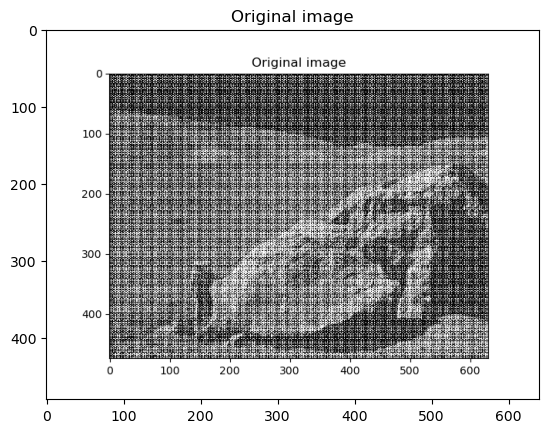

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PIL, urllib
from matplotlib.colors import LogNorm

url = 'https://scipy-lectures.org/_images/sphx_glr_plot_fft_image_denoise_001.png'
im = np.array(PIL.Image.open(urllib.request.urlopen(url)))

plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')

In [61]:
from scipy import fftpack
im_fft = np.fft.fft2(image)

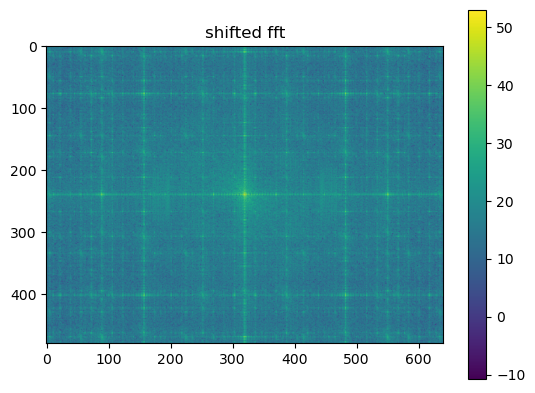

In [62]:
plt.imshow(10*np.log10(np.abs(np.fft.fftshift(im_fft))))
plt.title('shifted fft')
plt.colorbar()

/var/folders/4w/ssz2zjl56pxgf3w8b2b78c2c0000gr/T/ipykernel_8236/1890784668.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(10*np.log10(np.abs(im_fft)))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


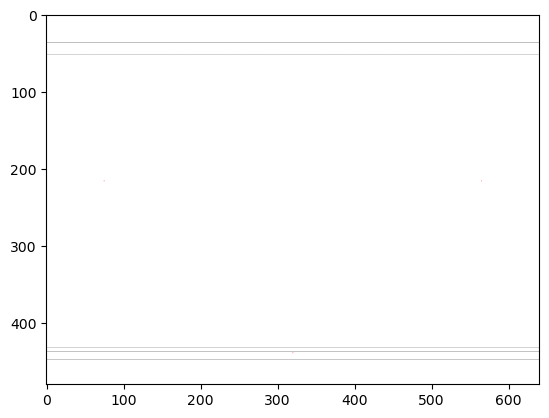

In [40]:
plt.imshow(10*np.log10(np.abs(im_fft)))
#plt.imshow(np.log10(np.abs(im_fft)+1))

TypeError: Image data of dtype complex128 cannot be converted to float

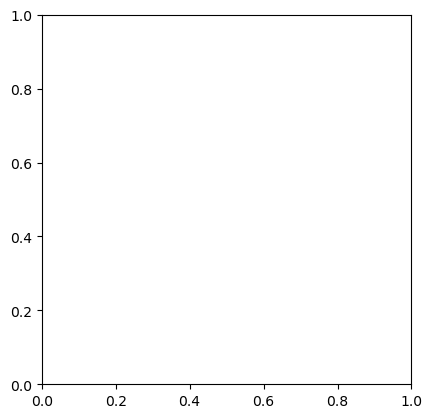

In [9]:
plt.imshow(im_fft)

In [ ]:
# Show the results
def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')

In [57]:
io.imread?

Signature: io.imread(fname, as_gray=False, plugin=None, **plugin_args)
Docstring:
Load an image from file.

Parameters
----------
fname : str or pathlib.Path
    Image file name, e.g. ``test.jpg`` or URL.
as_gray : bool, optional
    If True, convert color images to gray-scale (64-bit floats).
    Images that are already in gray-scale format are not converted.
plugin : str, optional
    Name of plugin to use.  By default, the different plugins are
    tried (starting with imageio) until a suitable
    candidate is found.  If not given and fname is a tiff file, the
    tifffile plugin will be used.

Other Parameters
----------------
plugin_args : keywords
    Passed to the given plugin.

Returns
-------
img_array : ndarray
    The different color bands/channels are stored in the
    third dimension, such that a gray-image is MxN, an
    RGB-image MxNx3 and an RGBA-image MxNx4.
File:      ~/anaconda3/envs/mccancer/lib/python3.10/site-packages/skimage/io/_io.py
Type:      function

(480, 640) float64


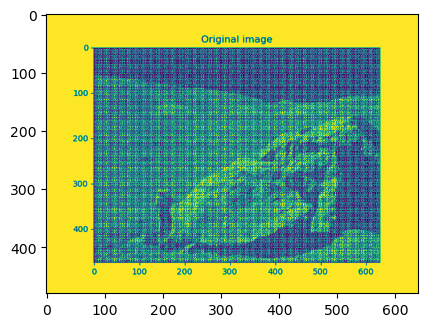

In [60]:
from skimage import io
image = io.imread('https://scipy-lectures.org/_images/sphx_glr_plot_fft_image_denoise_001.png',
                 as_gray=True)
M, N = image.shape

f, ax = plt.subplots(figsize=(4.8, 4.8))
ax.imshow(image)

print((M, N), image.dtype)

In [48]:
F = fftpack.fftn(im)
M, N = image.shape

F_magnitude = np.abs(F)
F_magnitude = fftpack.fftshift(F_magnitude)
f, ax = plt.subplots(figsize=(4.8, 4.8))

ax.imshow(np.log(1 + F_magnitude), cmap='viridis',
          extent=(-N // 2, N // 2, -M // 2, M // 2))
ax.set_title('Spectrum magnitude');

ValueError: too many values to unpack (expected 2)